# Descriptive statistics

In this notebook we'll see how to calculate numerical and graphical summaries of different types of data. Open the [chapter preview](https://minireference.com/static/excerpts/noBSstats/descriptive_statistics.pdf) in another tab, and follow along with the hands on calculations based on `pandas` and `seaborn`.

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",  # ALT sns.color_palette('Blues', 4)
    rc={
        'figure.figsize': (7,4),
        'font.serif': ['Palatino'],
        'font.family': 'serif',
        # 'font.size': 20,
        # 'axes.titlesize':22,
        # 'axes.labelsize':20,
        # 'legend.fontsize': 16,
        # 'legend.title_fontsize': 18,
        # 'xtick.labelsize': 12,
        # 'ytick.labelsize': 12,
       }
)
pd.set_option("display.precision", 2)


%config InlineBackend.figure_format = 'retina'

In [2]:
for key in list(plt.rcParamsDefault.keys()):
    if 'size' in key:
        print(key, plt.rcParamsDefault[key])

agg.path.chunksize 0
axes.labelsize medium
axes.titlesize large
boxplot.flierprops.markersize 6.0
boxplot.meanprops.markersize 6.0
errorbar.capsize 0.0
figure.figsize [6.4, 4.8]
figure.titlesize large
font.size 10.0
legend.fontsize medium
legend.title_fontsize None
lines.markersize 6.0
ps.papersize letter
xtick.labelsize medium
xtick.major.size 3.5
xtick.minor.size 2.0
ytick.labelsize medium
ytick.major.size 3.5
ytick.minor.size 2.0


In [3]:
#@title Load CSV data
import io
data_file = io.StringIO("""
student_ID,background,curriculum,effort,score
1,arts,debate,10.96,75
2,science,lecture,8.69,75
3,arts,debate,8.6,67
4,arts,lecture,7.92,70.3
5,science,debate,9.9,76.1
6,business,debate,10.8,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57
10,science,lecture,7.71,69
11,business,debate,9.82,70.4
12,arts,debate,11.53,96.2
13,science,debate,7.1,62.9
14,science,lecture,6.39,57.6
15,arts,debate,12,84.3
""")

In [4]:
students = pd.read_csv(data_file, index_col="student_ID")
students

,background,curriculum,effort,score
student_ID,,,,
1,arts,debate,10.96,75.0
2,science,lecture,8.69,75.0
3,arts,debate,8.60,67.0
4,arts,lecture,7.92,70.3
5,science,debate,9.90,76.1
6,business,debate,10.80,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57.0


In [5]:
students.groupby('curriculum')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
curriculum,,,,,,,,
debate,8.0,76.46,10.52,62.9,69.55,75.55,80.92,96.2
lecture,7.0,68.14,7.76,57.0,63.30,70.30,73.85,75.4


In [6]:
# rows
students.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='student_ID')

In [7]:
# columns
students.columns

Index(['background', 'curriculum', 'effort', 'score'], dtype='object')

# Describing numeric data

Let'look at the scrore variable.

In [8]:
scores = students['score']
scores.describe()

count    15.00
mean     72.58
std       9.98
min      57.00
25%      68.00
50%      72.70
75%      75.75
max      96.20
Name: score, dtype: float64

In [9]:
str(list(scores))

'[75.0, 75.0, 67.0, 70.3, 76.1, 79.8, 72.7, 75.4, 57.0, 69.0, 70.4, 96.2, 62.9, 57.6, 84.3]'

In [10]:
students['score'].describe()

count    15.00
mean     72.58
std       9.98
min      57.00
25%      68.00
50%      72.70
75%      75.75
max      96.20
Name: score, dtype: float64

In [11]:
str(sorted(scores))

'[57.0, 57.6, 62.9, 67.0, 69.0, 70.3, 70.4, 72.7, 75.0, 75.0, 75.4, 76.1, 79.8, 84.3, 96.2]'

In [12]:
students[['score']].describe()

,score
count,15.00
mean,72.58
std,9.98
min,57.00
25%,68.00
50%,72.70
75%,75.75
max,96.20


In [13]:
scores.median()

72.7

In [14]:
scores.max()

96.2

In [15]:
scores.var()  # sample variance,  1/(n-1) EE(x-mean)^2

99.58600000000001

In [16]:
scores.std()

9.979278531036199

In [17]:
# OLD -- calculated using populaiton formulas
# scores.var(ddof=0)  # variance 1/n EE(x-mean)^2   (not bias corrected)
# scores.std(ddof=0)

In [18]:
scores.value_counts(bins=[50,60,70,80,90,100]).sort_index()

(49.999, 60.0]    2
(60.0, 70.0]      3
(70.0, 80.0]      8
(80.0, 90.0]      1
(90.0, 100.0]     1
Name: score, dtype: int64

In [19]:
# note mode is the bin 70--80, which contains 8 values

In [20]:
# scores.hist()

In [21]:
# scores.hist(bins=[50,60,70,80,90,100])

<AxesSubplot:xlabel='score', ylabel='Count'>

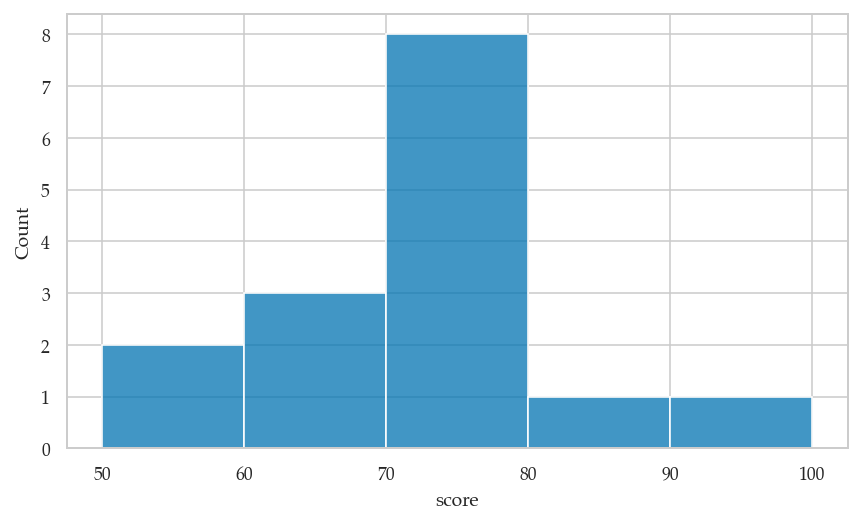

In [22]:
sns.histplot(x="score", data=students, bins=[50,60,70,80,90,100])

<AxesSubplot:xlabel='score', ylabel='Count'>

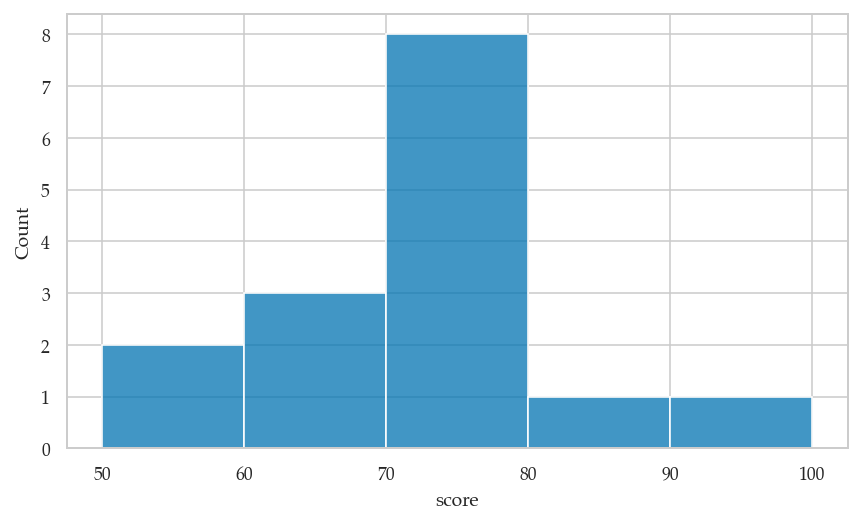

In [23]:
sns.histplot(x=scores, bins=[50,60,70,80,90,100])

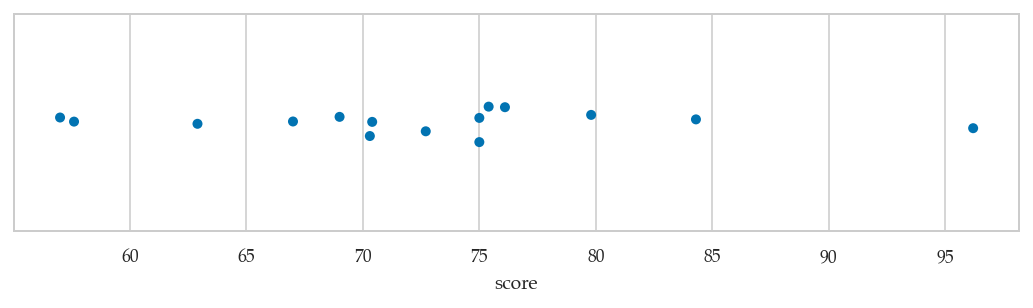

In [24]:
with plt.rc_context({'figure.figsize':(9,2)}):
    sns.stripplot(x=scores)

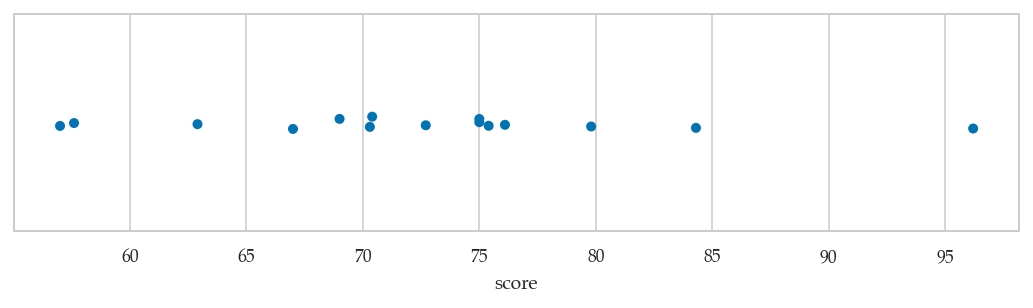

In [25]:
with plt.rc_context({'figure.figsize':(9,2)}):
    sns.stripplot(x="score", data=students, jitter=0.03)

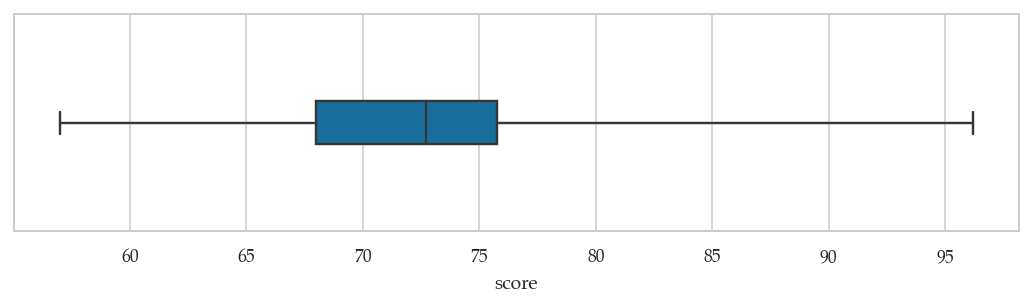

In [26]:
with plt.rc_context({'figure.figsize':(9,2)}):
    sns.boxplot(x="score", data=students, width=0.2, whis=10)

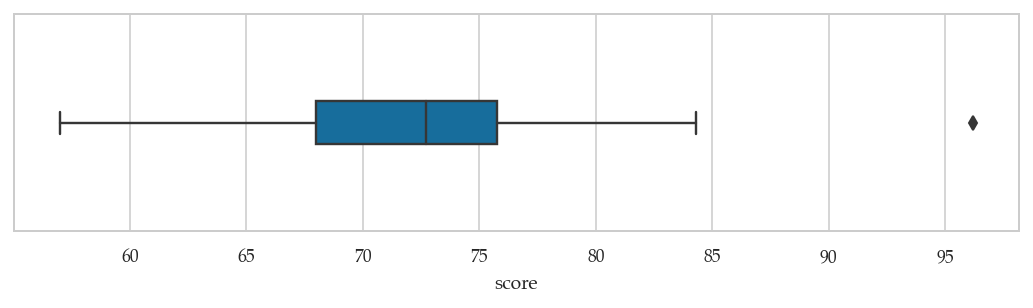

In [27]:
with plt.rc_context({'figure.figsize':(9,2)}):
    sns.boxplot(x=scores, width=0.2)

In [28]:
scores.quantile(0.25)  # Q1

68.0

In [29]:
scores.quantile(0.5)  # Q2 = median

72.7

In [81]:
scores.quantile(0.75)  # Q3

75.75

In [31]:
IQR = scores.quantile(0.75) - scores.quantile(0.25)
IQR

7.75

In [80]:
from scipy import stats
stats.iqr(scores)

7.75

#### Example distributions with different Std

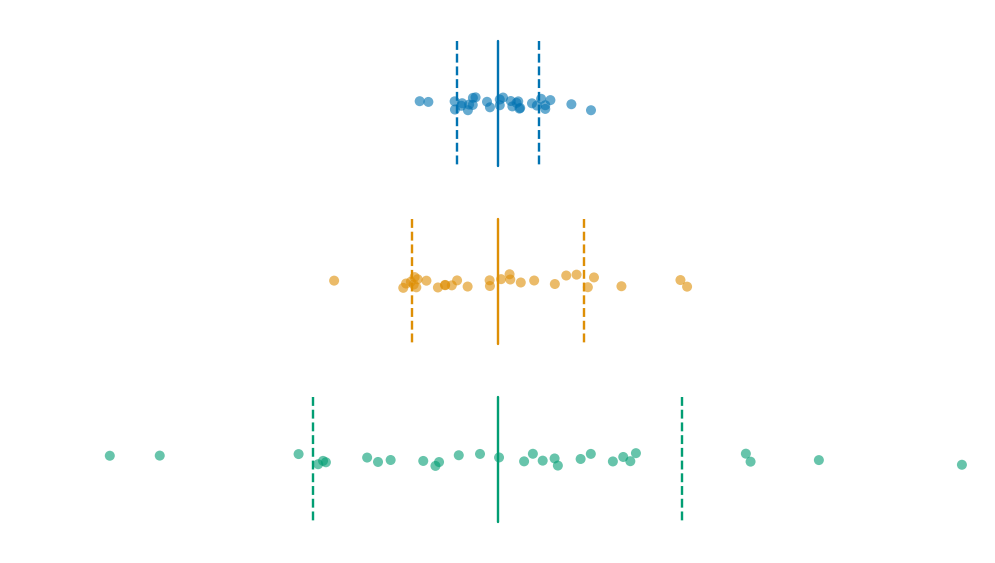

In [32]:
import matplotlib.ticker as ticker
from scipy.stats.distributions import norm

filename = 'figures/descriptive_statistics__same_mean_different_Std.pdf'

np.random.seed(222)
mean = 0
stda, stdb, stdc = 5, 10, 20
n = 30

dfabc = pd.DataFrame({
    'a)': norm.rvs(mean, stda, size=n),
    'b)': norm.rvs(mean, stdb, size=n),
    'c)': norm.rvs(mean, stdc, size=n)
}).melt()

with sns.axes_style("ticks"):
    ax = sns.stripplot(y="variable", x="value", data=dfabc, jitter=0.04, alpha=0.6)
    ax.set(xlabel=None, ylabel=None)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    absmax = dfabc['value'].apply(abs).max()
    xlim = absmax + 2 
    ax.set(xlim=(-xlim, xlim))
    sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
    ax.grid(False)
    ax.tick_params(left=False, bottom=False)

color0 = sns.color_palette()[0]
color1 = sns.color_palette()[1]
color2 = sns.color_palette()[2]

def drawlines(ax, data, lims, color):
    mean = 0 # data.mean()
    std = data.std()
    ax.axvline(mean, *lims, linestyle='-', color=color)    
    ax.axvline(mean+std, *lims, linestyle='--', color=color)
    ax.axvline(mean-std, *lims, linestyle='--', color=color)

eps = 0.05

dataa = dfabc[dfabc['variable']=='a)']['value']
datab = dfabc[dfabc['variable']=='b)']['value']
datac = dfabc[dfabc['variable']=='c)']['value']

drawlines(ax, dataa, (  1-eps, 2/3+eps), color=color0)
drawlines(ax, datab, (2/3-eps, 1/3+eps), color=color1)
drawlines(ax, datac, (1/3-eps,     eps), color=color2)

ax.figure.tight_layout()
ax.figure.savefig(filename, dpi=300, bbox_inches=0, pad_inches=0)

## Comparing two numeric variables


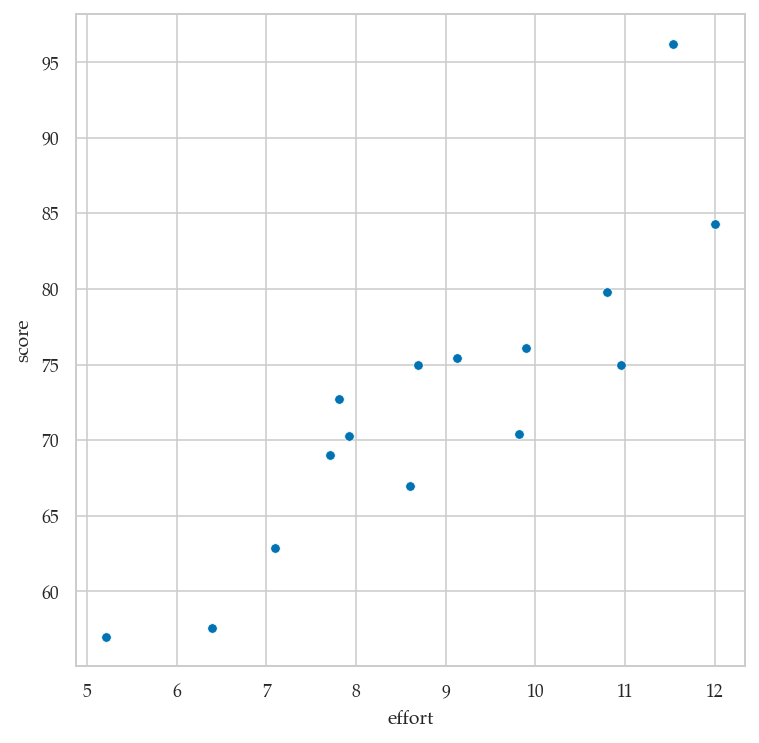

In [83]:
with plt.rc_context({'figure.figsize':(6,6)}):
    sns.scatterplot(x="effort", y="score", data=students)

In [35]:
students.cov()
students.cov()['effort']['score']   # note: this uses 1/n-1

17.097314285714287

In [36]:
students.corr()['effort']['score']  # note: this uses 1/n-1

0.8794375135614694

## Multiple numerical variables

<AxesSubplot:xlabel='score', ylabel='curriculum'>

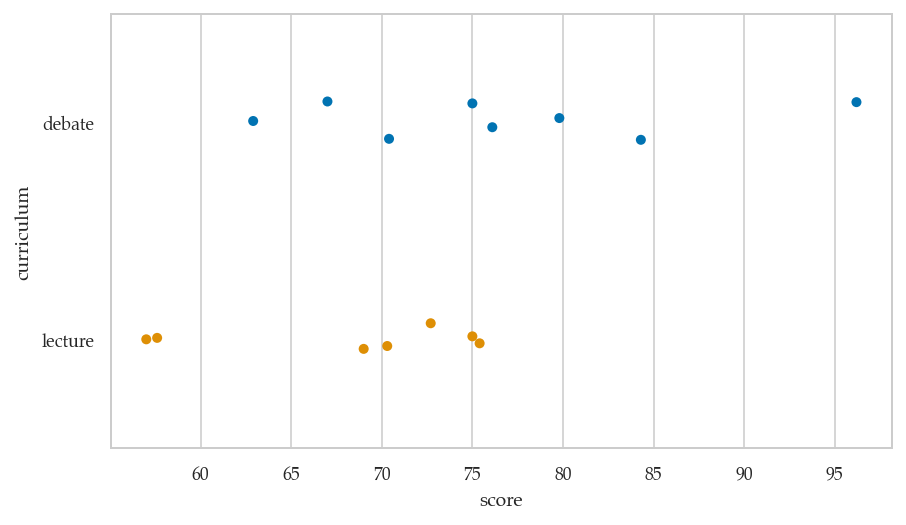

In [37]:
sns.stripplot(x="score", y="curriculum", data=students, jitter=True)

<AxesSubplot:xlabel='score', ylabel='curriculum'>

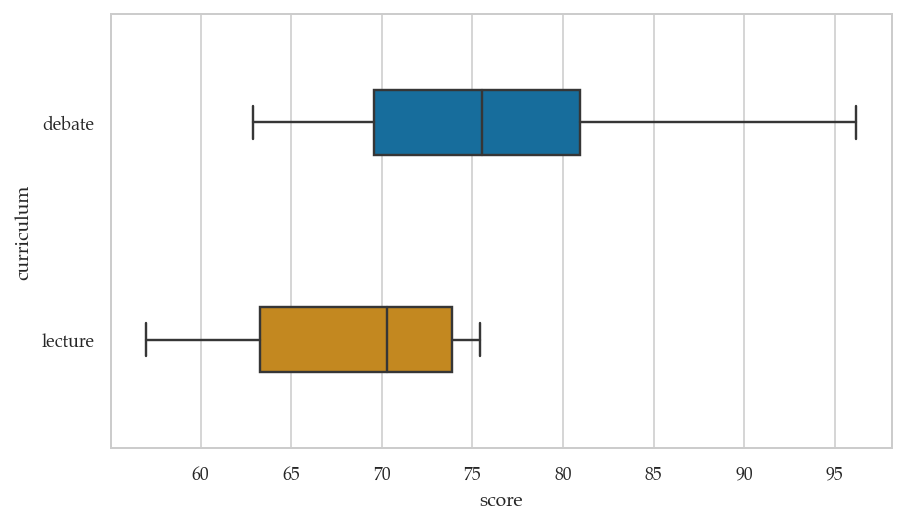

In [38]:
sns.boxplot(x="score", y="curriculum", width=0.3, data=students)

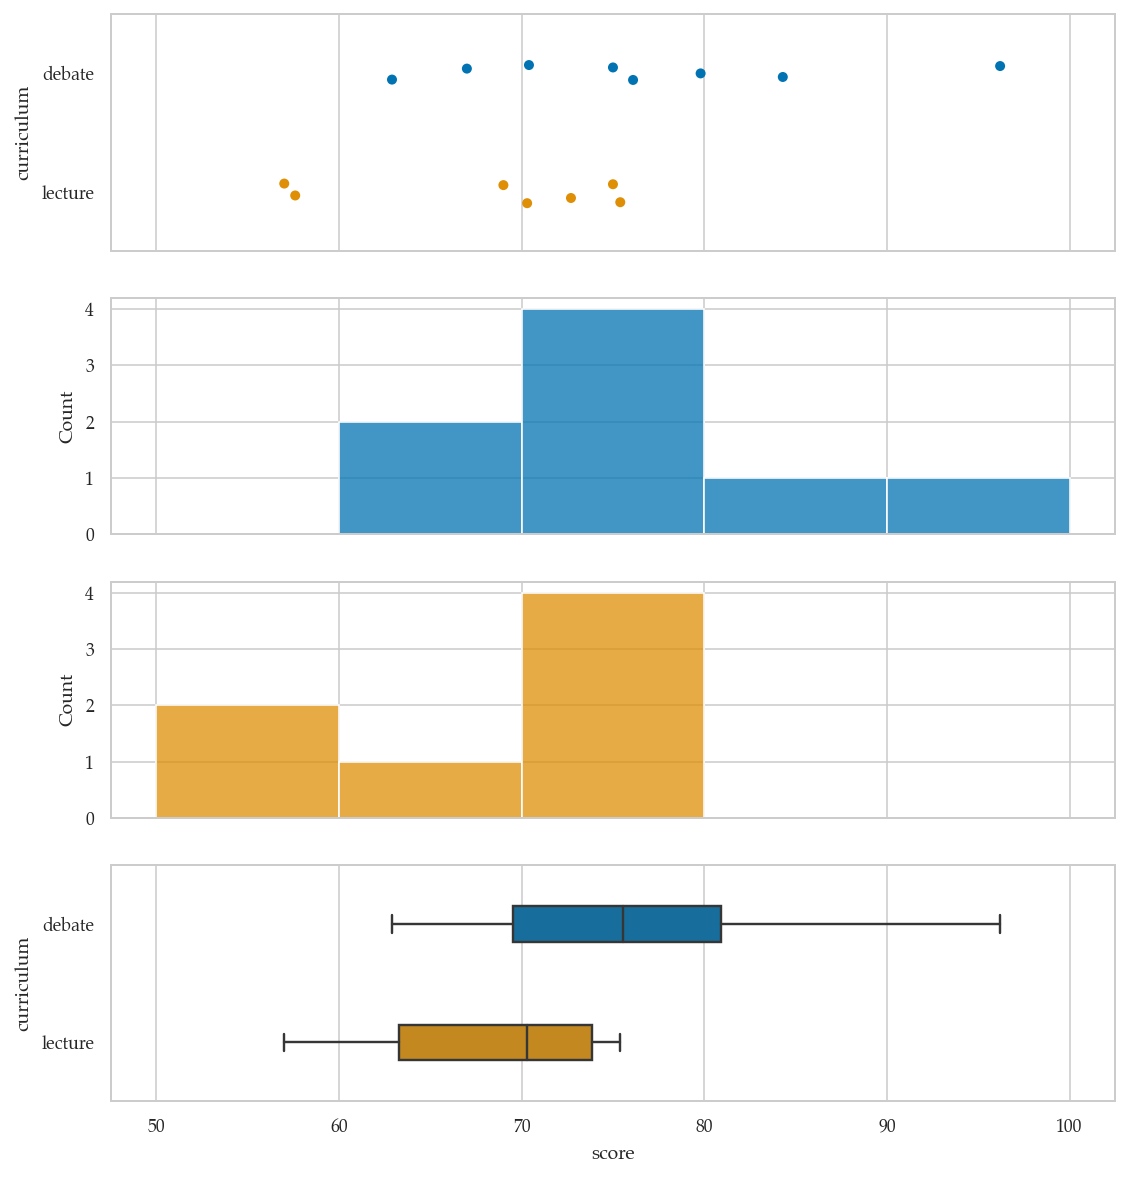

In [39]:
# combined plots
with plt.rc_context({'figure.figsize':(9,10)}):
    fig, axes = plt.subplots(4, 1, sharex=True)

    # stripplots
    g0 = sns.stripplot(x="score", y="curriculum", data=students, ax=axes[0])
    g0.set(xlabel=None)

    # histograms
    blue, yellow  = sns.color_palette()[0], sns.color_palette()[1]
    bins = [50, 60, 70, 80, 90, 100]
    debatescores = students[students["curriculum"]=="debate"]
    lecturescores = students[students["curriculum"]=="lecture"]
    sns.histplot(x="score", data=debatescores, color=blue, ax=axes[1], bins=bins)
    sns.histplot(x="score", data=lecturescores, color=yellow, ax=axes[2], bins=bins)

    # boxplots
    sns.boxplot(x="score", y="curriculum", data=students, width=0.3, ax=axes[3])

In [40]:
#     fig.tight_layout()
#     # PDF backend
#     fig.savefig(
#         '/Users/ivan//Desktop/test-300dpi.pdf',
#         dpi=300, bbox_inches=0, pad_inches=0,
#     )
#
#     # PGF backend
#     fig.savefig('/Users/ivan//Desktop/test-300dpi.pgf')

<AxesSubplot:xlabel='curriculum', ylabel='score'>

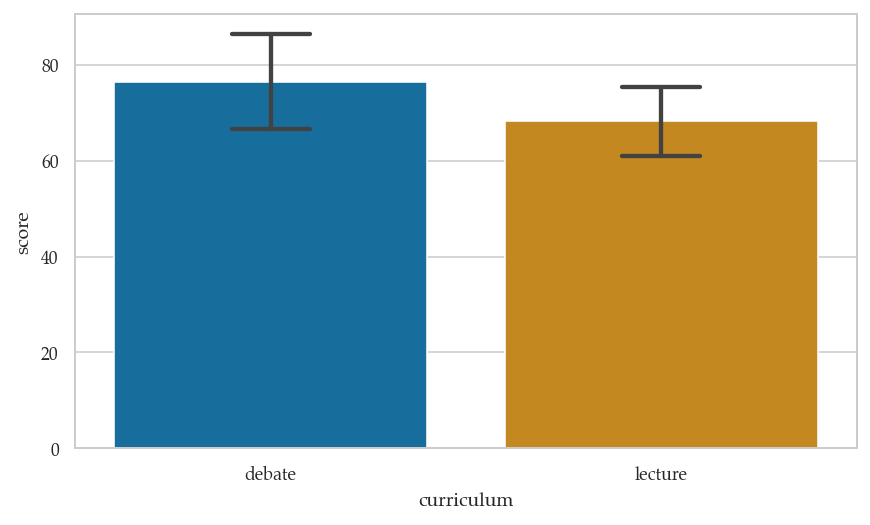

In [41]:
sns.barplot(x="curriculum", y="score",  ci="sd", data=students, capsize=.2)

# Categorical data

In [42]:
background = students['background']
background

student_ID
1         arts
2      science
3         arts
4         arts
5      science
6     business
7      science
8     business
9     business
10     science
11    business
12        arts
13     science
14     science
15        arts
Name: background, dtype: object

In [43]:
# frequencies
background.value_counts()

science     6
arts        5
business    4
Name: background, dtype: int64

In [44]:
# relative frequencies
background.value_counts(normalize=True)

science     0.40
arts        0.33
business    0.27
Name: background, dtype: float64

In [45]:
# ALT. 
# background.value_counts() / len(background)

<AxesSubplot:xlabel='background', ylabel='count'>

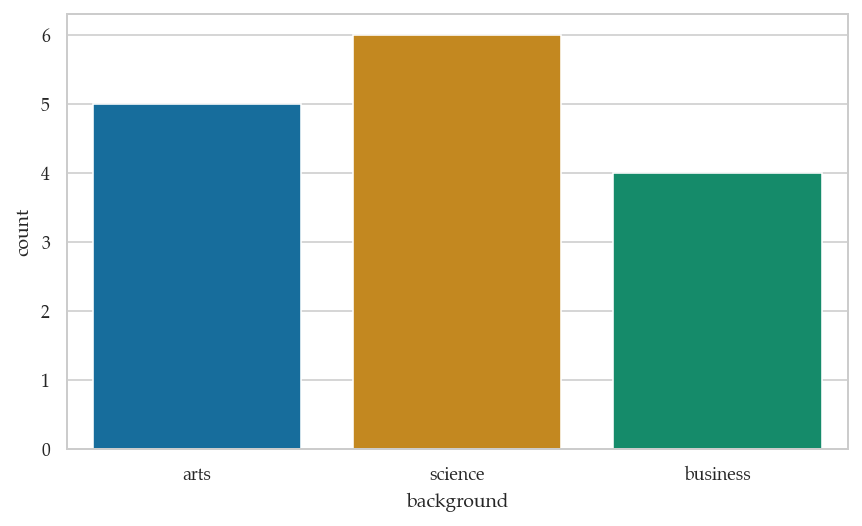

In [46]:
# bar chart of counts
sns.countplot(x="background", data=students)

## Comparing two categorical variables

<AxesSubplot:xlabel='background', ylabel='Count'>

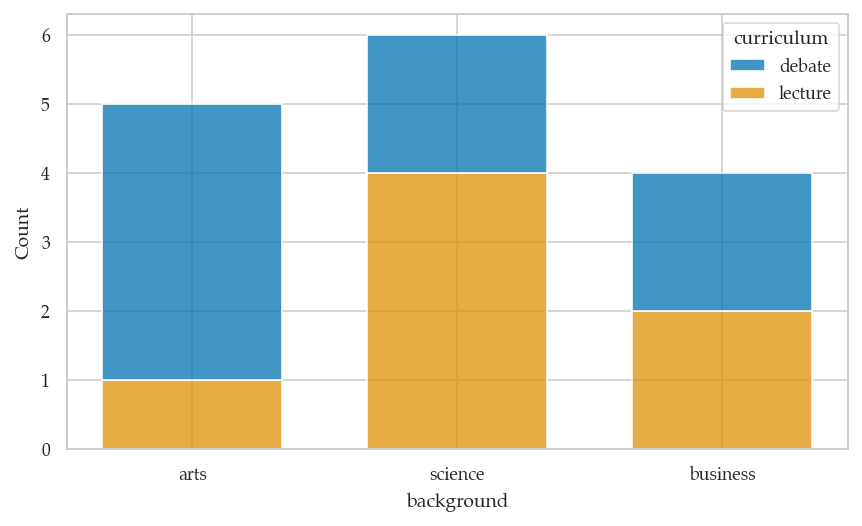

In [47]:
sns.histplot(data=students, x="background", hue="curriculum", shrink=.68, multiple='stack')

In [48]:
# ALT.
# sns.displot(data=students, x='background', hue='curriculum', multiple='stack', shrink=0.8)

<AxesSubplot:xlabel='background', ylabel='count'>

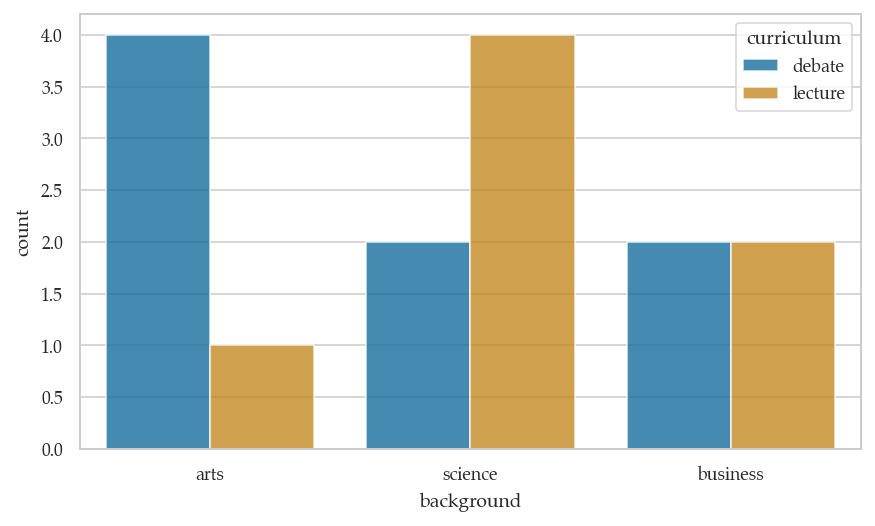

In [49]:
sns.countplot(x='background', hue='curriculum', data=students, alpha=0.8)

In [50]:
pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    margins=True,
    margins_name="Total",
)

background,arts,business,science,Total
curriculum,,,,
debate,4,2,2,8
lecture,1,2,4,7
Total,5,4,6,15


In [51]:
# pd.crosstab(
#     index=students['curriculum'],
#     columns=students['background'],
# ).T.plot(kind="bar", stacked=True, rot=0)

In [52]:
# pd.crosstab(
#     index=students['background'],
#     columns=students['curriculum'],
# ).plot(kind='bar', stacked=True, rot=0)

In [53]:
pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    margins=True,
    normalize=True,
    margins_name="Total",
)

background,arts,business,science,Total
curriculum,,,,
debate,0.27,0.13,0.13,0.53
lecture,0.07,0.13,0.27,0.47
Total,0.33,0.27,0.40,1.00


<AxesSubplot:xlabel='background', ylabel='Proportion'>

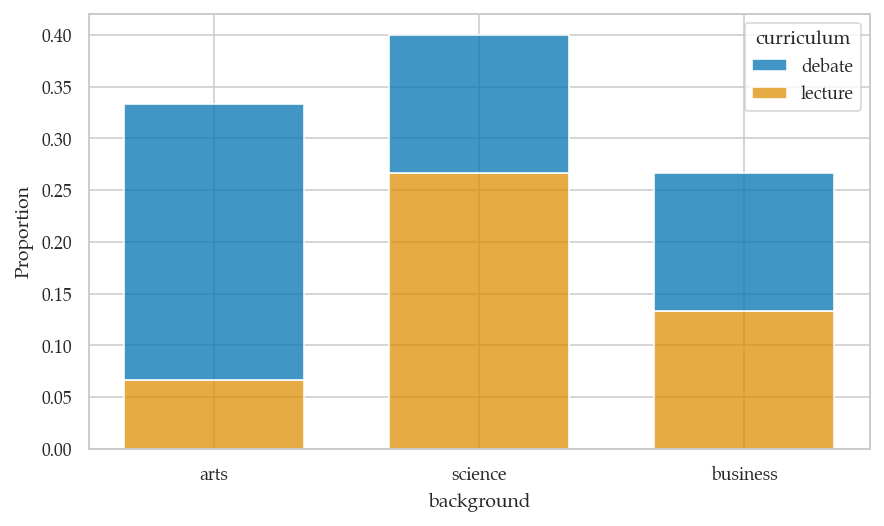

In [54]:
sns.histplot(data=students, x="background", hue="curriculum", shrink=.68, multiple='stack', stat="proportion")

In [55]:
pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    margins=True,
    normalize='columns',
    margins_name="Total",
)

background,arts,business,science,Total
curriculum,,,,
debate,0.8,0.5,0.33,0.53
lecture,0.2,0.5,0.67,0.47


Text(0, 0.5, 'conditional relative frequency')

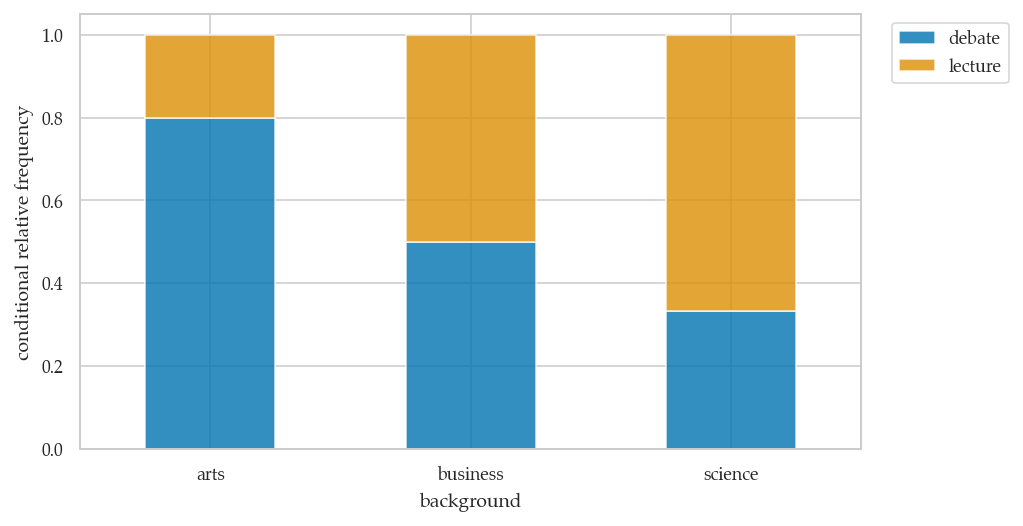

In [56]:
ct1 = pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    normalize='columns',
)
ct1.T.plot(kind='bar', stacked=True, rot=0, alpha=0.8)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.ylabel("conditional relative frequency")

In [57]:
pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    margins=True,
    normalize='index',
    margins_name="Total",
)

background,arts,business,science
curriculum,,,
debate,0.50,0.25,0.25
lecture,0.14,0.29,0.57
Total,0.33,0.27,0.40


Text(0, 0.5, 'conditional relative frequency')

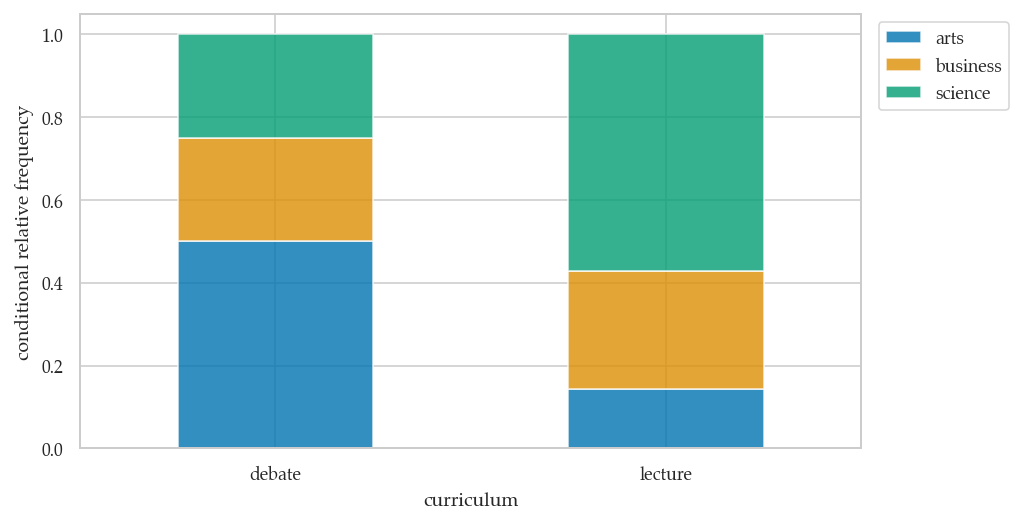

In [58]:
ct2 = pd.crosstab(
    index=students['curriculum'],
    columns=students['background'],
    normalize='index',
)
ct2.plot(kind='bar', stacked=True, rot=0, alpha=0.8)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.ylabel("conditional relative frequency")

# CUT MATERIAL

In [59]:
pd.pivot_table(
    students,
    index='curriculum',
    columns='background',
    values='score',       # dummy placeholder
    aggfunc='count',
    fill_value=0,
    margins=True,
)

background,arts,business,science,All
curriculum,,,,
debate,4,2,2,8
lecture,1,2,4,7
All,5,4,6,15


In [60]:
# equivalent using groupby + multiindex
students.groupby(['curriculum', 'background'])['background'].count().unstack().fillna(0)


background,arts,business,science
curriculum,,,
debate,4,2,2
lecture,1,2,4


<AxesSubplot:xlabel='background', ylabel='curriculum'>

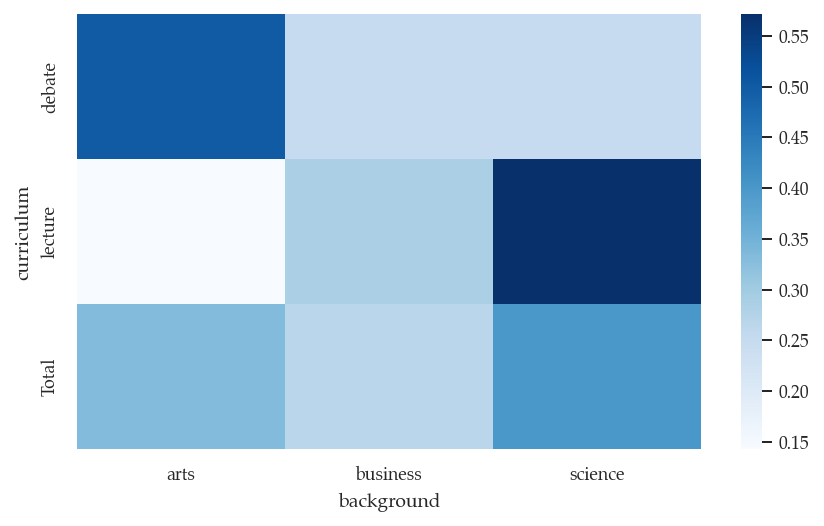

In [61]:
sns.heatmap(
    pd.crosstab(
        index=students['curriculum'],
        columns=students['background'],
        margins=True,
        normalize='index',
        margins_name="Total",
    ),
    cmap="Blues"
)

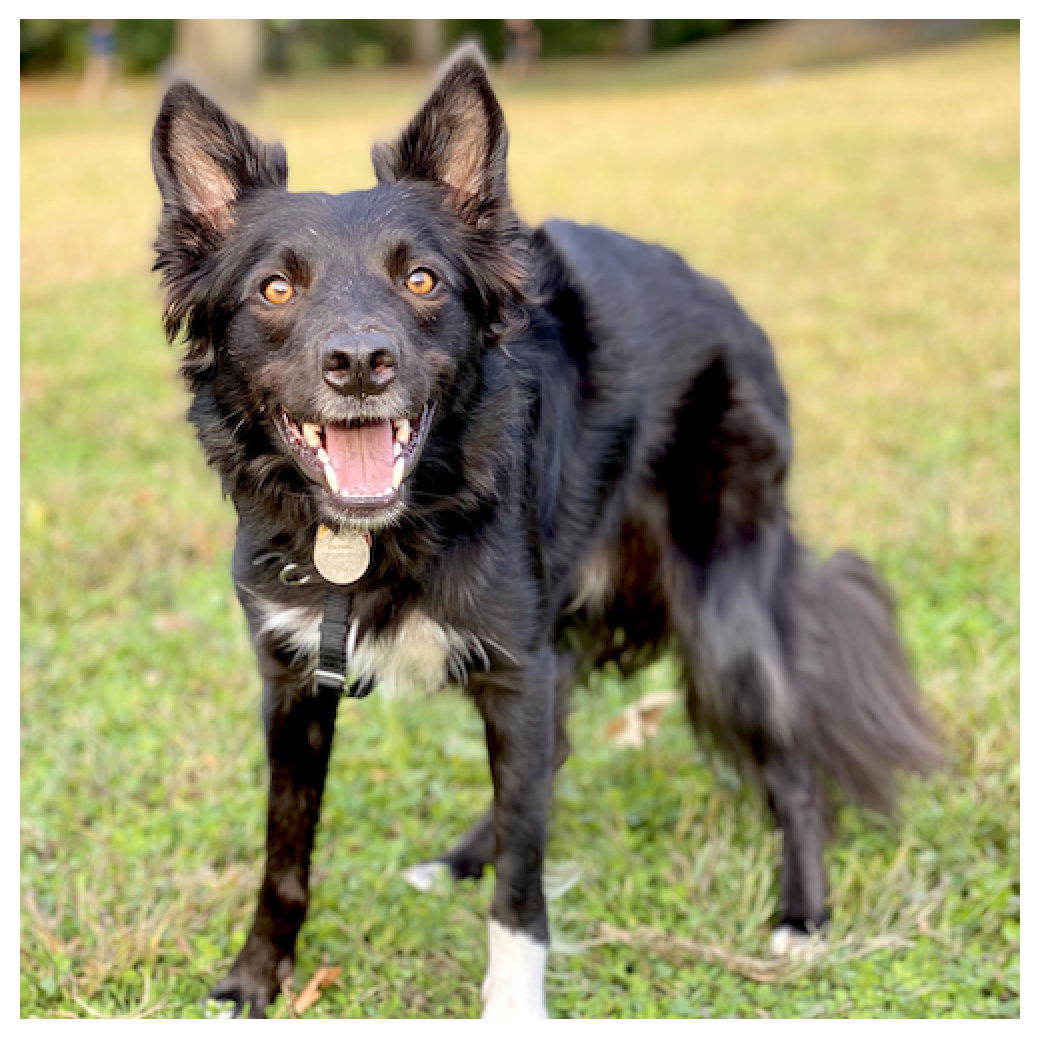

In [62]:
sns.dogplot()

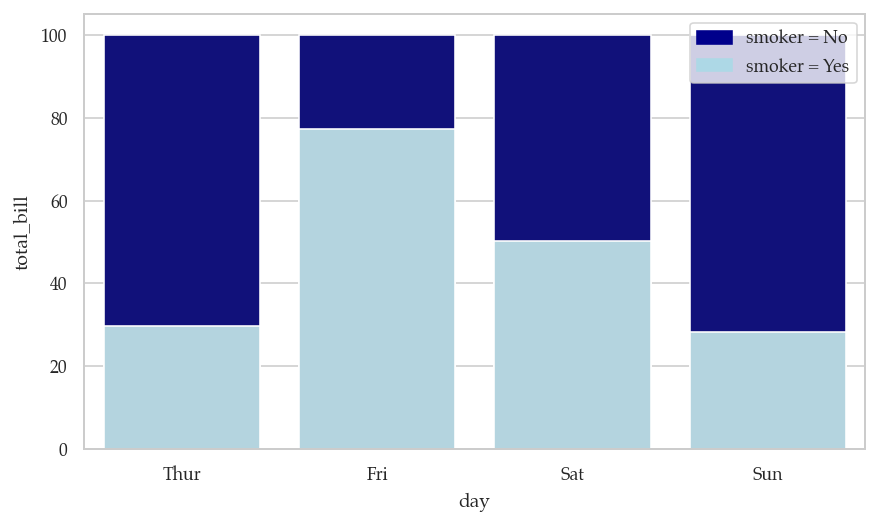

In [64]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = sns.load_dataset("tips")

# set the figure size
# plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('day')['total_bill'].sum().reset_index()
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

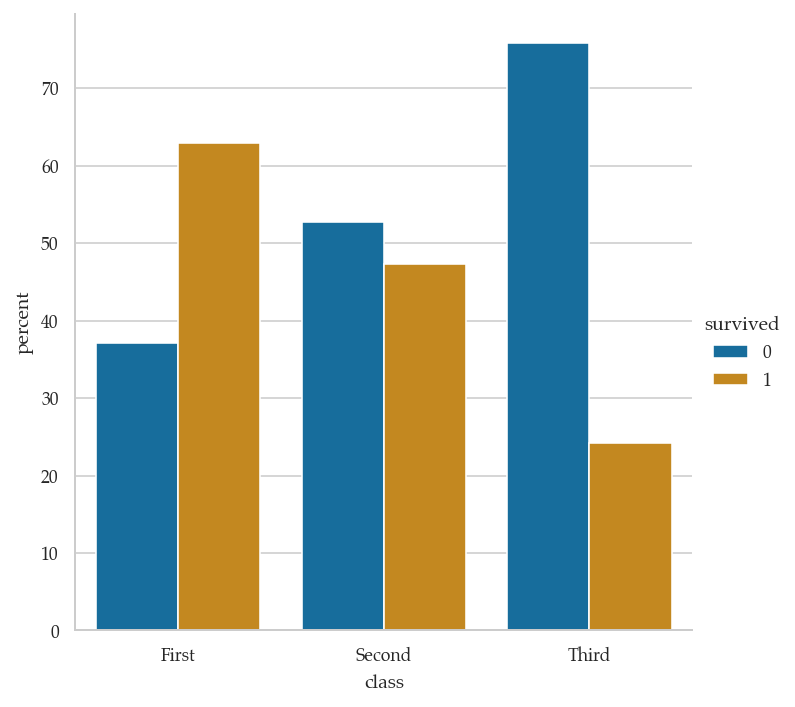

In [65]:
df = sns.load_dataset('titanic')

(df
  .groupby('class')['survived']
  .value_counts(normalize=True)
  .mul(100)
  .rename('percent')
  .reset_index()
  .pipe((sns.catplot,'data'), x='class', y='percent', hue='survived', kind='bar')
)


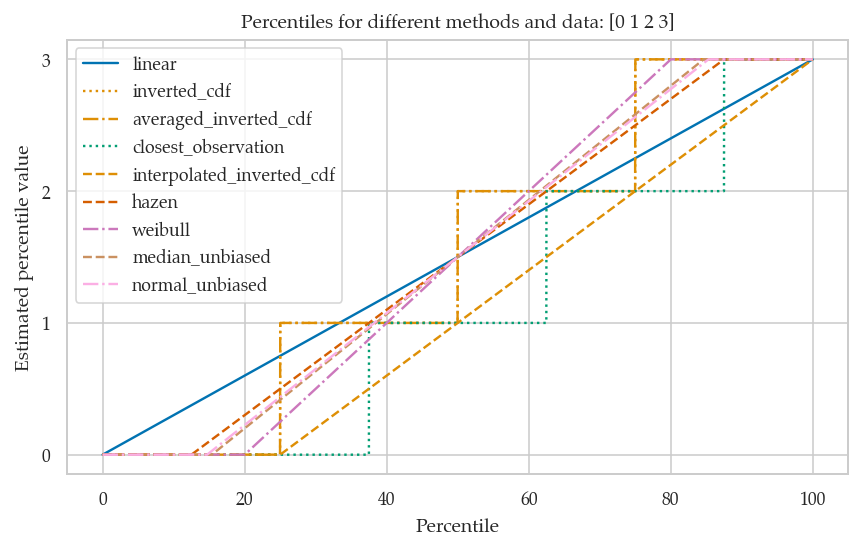

In [66]:

import matplotlib.pyplot as plt
a = np.arange(4)
p = np.linspace(0, 100, 6001)
ax = plt.gca()

lines = [
    ('linear', '-', 'C0'),
    ('inverted_cdf', ':', 'C1'),
    # Almost the same as `inverted_cdf`:
    ('averaged_inverted_cdf', '-.', 'C1'),
    ('closest_observation', ':', 'C2'),
    ('interpolated_inverted_cdf', '--', 'C1'),
    ('hazen', '--', 'C3'),
    ('weibull', '-.', 'C4'),
    ('median_unbiased', '--', 'C5'),
    ('normal_unbiased', '-.', 'C6'),
    ]

for method, style, color in lines:
    ax.plot(
        p, np.percentile(a, p, method=method),
        label=method, linestyle=style, color=color
    )

ax.set(
    title='Percentiles for different methods and data: ' + str(a),
    xlabel='Percentile',
    ylabel='Estimated percentile value',
    yticks=a
)
ax.legend()
plt.show()


In [ ]:
import numpy as np
np.percentile?

In [ ]:
np.__version__

In [68]:
def quartile(x, k):
    xs = sorted(x)
    ifloat = k*(len(xs)-1)/4
    ifloor = int(ifloat)  # == math.floor(ifloat)
    ifrac = ifloat - ifloor
    return xs[ifloor] + ifrac*(xs[ifloor+1] - xs[ifloor])

In [70]:
quartile(scores, 1), quartile(scores, 3)

(68.0, 75.75)

In [72]:
def quantile(vals, q):
    """
    Compute the ``q``th quantile of the list ``vals`` using linear interpolation.
    Equivalent to ``quantile(vals, q, method="linear")`` in numpy.
    Equivalent to ``quantile(vals, q, type=7)`` in R.
    """
    svals = sorted(vals)
    ifloat = q * (len(vals)-1)
    ifloor = int(ifloat)
    ifrac = ifloat - ifloor
    return svals[ifloor] + ifrac*(svals[ifloor+1] - svals[ifloor])

In [73]:
quantile(scores, 0.25), quantile(scores, 0.75)

(68.0, 75.75)

In [77]:
np.random.randint(1,100)

69

In [79]:
scores.quantile(0.25), scores.quantile(0.75)

(68.0, 75.75)